In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from adam_prepare import titanic_pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [2]:
train, val, test = titanic_pipeline()
train.head()

,survived,age,sibsp,parch,fare,alone,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
748,0,19.0,1,0,53.1000,0,1,1,0,0,0,0,1
45,0,29.0,0,0,8.0500,1,1,0,0,1,0,0,1
28,1,29.0,0,0,7.8792,1,0,0,0,1,0,1,0
633,0,29.0,0,0,0.0000,1,1,1,0,0,0,0,1
403,0,28.0,1,0,15.8500,0,1,0,0,1,0,0,1


In [3]:
def xy_split(df):
    
    return df.drop(columns = ['survived']), df.survived

In [4]:
X_train, y_train = xy_split(train)
X_val, y_val = xy_split(val)

X_train.head()

,age,sibsp,parch,fare,alone,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
748,19.0,1,0,53.1000,0,1,1,0,0,0,0,1
45,29.0,0,0,8.0500,1,1,0,0,1,0,0,1
28,29.0,0,0,7.8792,1,0,0,0,1,0,1,0
633,29.0,0,0,0.0000,1,1,1,0,0,0,0,1
403,28.0,1,0,15.8500,0,1,0,0,1,0,0,1


In [5]:
(y_train == 0).mean()

0.6163723916532905

## Create a model that includes only age, fare, and pclass. Does this model perform better than your baseline?

yes it performs better than the baseline

In [6]:
def xy_split(df):
    
    return df.drop(columns = ['survived','sibsp', 'parch', 'alone', 'sex_male', 'embark_town_Cherbourg', 'embark_town_Queenstown', 'embark_town_Southampton' ]), df.survived

In [7]:
X_train, y_train = xy_split(train)
X_val, y_val = xy_split(val)

X_train.head()

,age,fare,class_First,class_Second,class_Third
748,19.0,53.1000,1,0,0
45,29.0,8.0500,0,0,1
28,29.0,7.8792,0,0,1
633,29.0,0.0000,1,0,0
403,28.0,15.8500,0,0,1


In [8]:
seed = 42

logreg = LogisticRegression(random_state = seed, max_iter = 400)

logreg.fit(X_train, y_train)

logreg.score(X_train, y_train), logreg.score(X_val, y_val)

(0.7142857142857143, 0.7164179104477612)

In [9]:
logreg.coef_

array([[-0.03829218,  0.00834182,  0.75538928,  0.11738762, -0.87374322]])

In [10]:
pd.DataFrame({'feature': X_train.columns,
              'coefficient': logreg.coef_[0]})

,feature,coefficient
0,age,-0.038292
1,fare,0.008342
2,class_First,0.755389
3,class_Second,0.117388
4,class_Third,-0.873743


## Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

In [11]:
def xy_split(df):
    
    return df.drop(columns = ['survived','sibsp', 'parch', 'alone', 'embark_town_Cherbourg', 'embark_town_Queenstown', 'embark_town_Southampton' ]), df.survived

In [12]:
X_train, y_train = xy_split(train)
X_val, y_val = xy_split(val)

X_train.head()

,age,fare,sex_male,class_First,class_Second,class_Third
748,19.0,53.1000,1,1,0,0
45,29.0,8.0500,1,0,0,1
28,29.0,7.8792,0,0,0,1
633,29.0,0.0000,1,1,0,0
403,28.0,15.8500,1,0,0,1


In [13]:
seed = 42

logreg = LogisticRegression(random_state = seed, max_iter = 400)

logreg.fit(X_train, y_train)

logreg.score(X_train, y_train), logreg.score(X_val, y_val)

(0.8041733547351525, 0.8208955223880597)

In [14]:
logreg.coef_

array([[-3.60726405e-02,  2.07767680e-03, -2.48763174e+00,
         1.05092107e+00, -2.72729153e-03, -1.04826634e+00]])

In [15]:
pd.DataFrame({'feature': X_train.columns,
              'coefficient': logreg.coef_[0]})

,feature,coefficient
0,age,-0.036073
1,fare,0.002078
2,sex_male,-2.487632
3,class_First,1.050921
4,class_Second,-0.002727
5,class_Third,-1.048266


## Try out other combinations of features and models.

## Use you best 3 models to predict and evaluate on your validate sample.

In [16]:
def xy_split(df):
    
    return df.drop(columns = ['fare', 'survived','sibsp', 'parch', 'alone', 'embark_town_Cherbourg', 'embark_town_Queenstown', 'embark_town_Southampton', 'class_First', 'class_Second', 'class_Third']), df.survived

In [17]:
X_train, y_train = xy_split(train)
X_val, y_val = xy_split(val)

X_train.head()

,age,sex_male
748,19.0,1
45,29.0,1
28,29.0,0
633,29.0,1
403,28.0,1


In [18]:
seed = 42

logreg1 = LogisticRegression(random_state = seed, max_iter = 300, 
                           solver = 'liblinear', penalty = 'l1')

logreg1.fit(X_train, y_train)

logreg1.score(X_train, y_train), logreg1.score(X_val, y_val)

(0.7913322632423756, 0.8134328358208955)

In [19]:
print('Coefficient: \n', logreg1.coef_)
print('Intercept: \n', logreg1.intercept_)


Coefficient: 
 [[-0.00919902 -2.49393205]]
Intercept: 
 [1.31950219]


In [20]:
pd.DataFrame({'feature': X_train.columns,
              'coefficient': logreg1.coef_[0]})

,feature,coefficient
0,age,-0.009199
1,sex_male,-2.493932


In [21]:
y_pred1 = logreg1.predict(X_val)
y_pred1[:5]


array([0, 0, 0, 0, 0])

In [22]:
y_pred_proba1 = logreg1.predict_proba(X_val)
y_pred_proba1[:5]

array([[0.80577751, 0.19422249],
       [0.81006004, 0.18993996],
       [0.79699361, 0.20300639],
       [0.80864062, 0.19135938],
       [0.78945013, 0.21054987]])

In [23]:
print(confusion_matrix(y_val, y_pred1))


[[71 11]
 [14 38]]


In [24]:
print(classification_report(y_val, y_pred1))


              precision    recall  f1-score   support

           0       0.84      0.87      0.85        82
           1       0.78      0.73      0.75        52

    accuracy                           0.81       134
   macro avg       0.81      0.80      0.80       134
weighted avg       0.81      0.81      0.81       134



In [25]:
y_pred_proba1 = np.array([i[1] for i in y_pred_proba1])

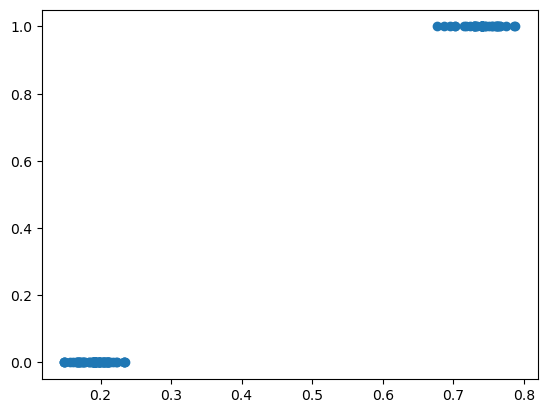

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_pred_proba1, y_pred1)

---

In [27]:
def xy_split(df):
    
    return df.drop(columns = ['fare', 'survived','sibsp', 'parch', 'alone', 'embark_town_Cherbourg', 'embark_town_Queenstown', 'embark_town_Southampton', 'age', 'sex_male']), df.survived

In [28]:
X_train, y_train = xy_split(train)
X_val, y_val = xy_split(val)

X_train.head()

,class_First,class_Second,class_Third
748,1,0,0
45,0,0,1
28,0,0,1
633,1,0,0
403,0,0,1


In [29]:
seed = 42

logreg2 = LogisticRegression(random_state = seed, max_iter = 100)

logreg2.fit(X_train, y_train)

logreg2.score(X_train, y_train), logreg2.score(X_val, y_val)

(0.6821829855537721, 0.6865671641791045)

In [30]:
print('Coefficient: \n', logreg2.coef_)
print('Intercept: \n', logreg2.intercept_)


Coefficient: 
 [[ 0.79318133  0.0565986  -0.84972951]]
Intercept: 
 [-0.24350024]


In [31]:
pd.DataFrame({'feature': X_train.columns,
              'coefficient': logreg2.coef_[0]})

,feature,coefficient
0,class_First,0.793181
1,class_Second,0.056599
2,class_Third,-0.849730


In [32]:
y_pred2 = logreg2.predict(X_val)
y_pred2[:5]


array([1, 0, 0, 1, 0])

In [33]:
y_pred_proba2 = logreg2.predict_proba(X_val)
y_pred_proba2[:5]

array([[0.3659384 , 0.6340616 ],
       [0.74898942, 0.25101058],
       [0.54658987, 0.45341013],
       [0.3659384 , 0.6340616 ],
       [0.54658987, 0.45341013]])

In [34]:
print(confusion_matrix(y_val, y_pred2))


[[70 12]
 [30 22]]


In [35]:
print(classification_report(y_val, y_pred2))


              precision    recall  f1-score   support

           0       0.70      0.85      0.77        82
           1       0.65      0.42      0.51        52

    accuracy                           0.69       134
   macro avg       0.67      0.64      0.64       134
weighted avg       0.68      0.69      0.67       134



In [36]:
y_pred_proba2 = np.array([i[1] for i in y_pred_proba2])

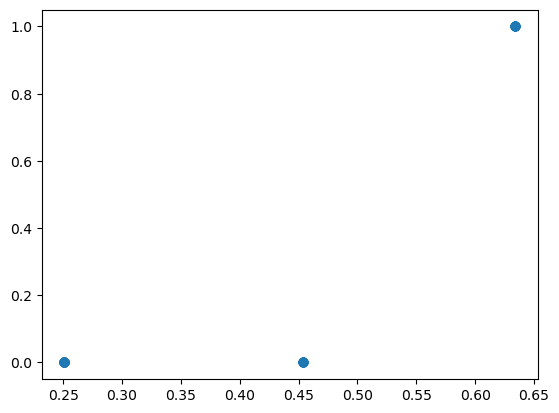

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_pred_proba2, y_pred2)

---

In [38]:
def xy_split(df):
    
    return df.drop(columns = ['survived']), df.survived

In [39]:
X_train, y_train = xy_split(train)
X_val, y_val = xy_split(val)
X_test, y_test = xy_split(test)

X_test.head()

,age,sibsp,parch,fare,alone,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
455,29.0,0,0,7.8958,1,1,0,0,1,1,0,0
607,27.0,0,0,30.5000,1,1,1,0,0,0,0,1
142,24.0,1,0,15.8500,0,0,0,0,1,0,0,1
883,28.0,0,0,10.5000,1,1,0,1,0,0,0,1
835,39.0,1,1,83.1583,0,0,1,0,0,1,0,0


In [51]:
seed = 42

logreg3 = LogisticRegression(random_state = seed, max_iter = 400, 
                           solver = 'liblinear', penalty = 'l1')

logreg3.fit(X_train, y_train)

logreg3.score(X_train, y_train), logreg3.score(X_val, y_val)

(0.8009630818619583, 0.8507462686567164)

In [41]:
print('Coefficient: \n', logreg3.coef_)
print('Intercept: \n', logreg3.intercept_)


Coefficient: 
 [[-0.0383273  -0.41889425 -0.13635479  0.00293138 -0.43476553 -2.53061173
   1.96696569  1.00970423  0.          0.          0.26943299 -0.2232585 ]]
Intercept: 
 [2.02789048]


In [42]:
pd.DataFrame({'feature': X_train.columns,
              'coefficient': logreg3.coef_[0]})

,feature,coefficient
0,age,-0.038327
1,sibsp,-0.418894
2,parch,-0.136355
3,fare,0.002931
4,alone,-0.434766
5,sex_male,-2.530612
6,class_First,1.966966
7,class_Second,1.009704
8,class_Third,0.000000
9,embark_town_Cherbourg,0.000000


In [43]:
y_pred3 = logreg3.predict(X_val)
y_pred3[:5]

array([1, 0, 0, 0, 0])

In [44]:
y_pred_proba3 = logreg3.predict_proba(X_val)
y_pred_proba3[:5]

array([[0.31503507, 0.68496493],
       [0.887567  , 0.112433  ],
       [0.67709605, 0.32290395],
       [0.57573061, 0.42426939],
       [0.6755725 , 0.3244275 ]])

In [45]:
print(confusion_matrix(y_val, y_pred3))


[[74  8]
 [12 40]]


In [46]:
print(classification_report(y_val, y_pred3))


              precision    recall  f1-score   support

           0       0.86      0.90      0.88        82
           1       0.83      0.77      0.80        52

    accuracy                           0.85       134
   macro avg       0.85      0.84      0.84       134
weighted avg       0.85      0.85      0.85       134



In [47]:
y_pred_proba3 = np.array([i[1] for i in y_pred_proba3])


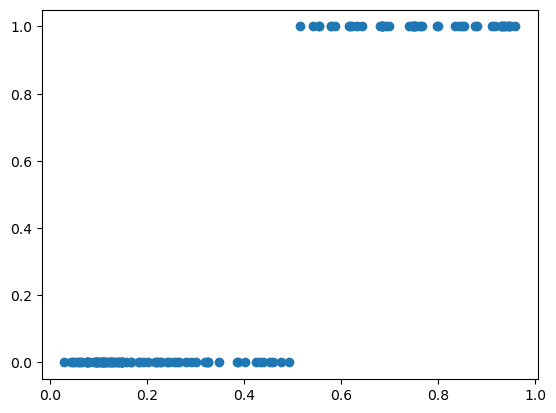

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_pred_proba3, y_pred3)



## Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?

In [49]:
y_pred4 = logreg3.predict(X_test)
y_pred_proba4 = logreg3.predict_proba(X_test)

print("Model 1: max_iter = 300, solver = liblinear, penalty = l1")

print('Accuracy: {:.2f}'.format(logreg3.score(X_test, y_test)))

print(confusion_matrix(y_test, y_pred4))

print(classification_report(y_test, y_pred4))

Model 1: max_iter = 300, solver = liblinear, penalty = l1
Accuracy: 0.77
[[69 14]
 [17 34]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.82        83
           1       0.71      0.67      0.69        51

    accuracy                           0.77       134
   macro avg       0.76      0.75      0.75       134
weighted avg       0.77      0.77      0.77       134



In [50]:
logreg3.score(X_train, y_train), logreg3.score(X_val, y_val), logreg3.score(X_test, y_test)

(0.8009630818619583, 0.8507462686567164, 0.7686567164179104)